In [31]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU - for testing

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

print(tf.__version__)

2.4.1


In [32]:
# Load the fashion images. Like the MNIST data set, but kind of more fun. 
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [33]:
# Need to map the class names to the train labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

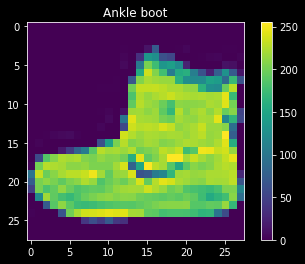

In [34]:
plt.figure()
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [35]:
# What do the images look like - 60,000 image 28x28 pixels
train_images.shape

(60000, 28, 28)

In [36]:
# Training labels - same number of labels as images
len(train_labels)

60000

In [37]:
test_images.shape # 10,000 images in the testing data

(10000, 28, 28)

In [38]:
"""
Now we need to normalize the data from 0-1.
"""
print("Max Val: ",np.max(train_images[0]))
print("Min Val: ",np.min(train_images[0]))

Max Val:  255
Min Val:  0


In [39]:
train_images = train_images / 255
test_images = test_images / 255

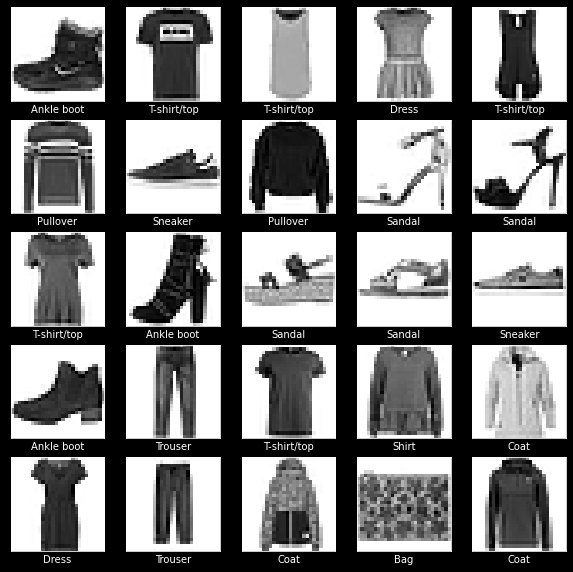

In [40]:
# Now let's show some of the images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 922us/step - loss: 0.6269 - accuracy: 0.7830
Epoch 2/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.3850 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.3426 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 2s 917us/step - loss: 0.3157 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.2952 - accuracy: 0.8918
Epoch 6/10
1875/1875 [==============================] - 2s 911us/step - loss: 0.2780 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 2s 890us/step - loss: 0.2650 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.2587 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 2s 875us/step - loss: 0.2457 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 2s 863u

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3428 - accuracy: 0.8830

Test accuracy: 0.8830000162124634


In [45]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [46]:
# Throw all the data into the model and it will output some predictions
predictions = probability_model.predict(test_images)

In [47]:
# Checking prediction 1 - gives range of values it thinks it could be
predictions[0]

array([2.9590905e-07, 6.5871570e-12, 6.4967387e-10, 1.2429267e-10,
       4.2501949e-10, 4.2365963e-04, 3.6661380e-08, 1.0709470e-02,
       3.0758261e-07, 9.8886627e-01], dtype=float32)

In [48]:
# Find the value that is the maximum probability
np.argmax(predictions[0])

9

In [49]:
test_labels[0] # Check to see if it is correct 

9

In [50]:
def plot_image(i, predictions_array, true_label, img):
    """
    Plot the image
    Args
        i: index being checked
        true_label: test_label_list
        img: image image to use
    """
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='white')

def plot_value_array(i, predictions_array, true_label):
    """
    Plot the input arrays. 
    Args:
        i: correct values index
        true_label: list of labels
        predictions_array: array of values that the model predicted
    """
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    _ = plt.xticks(range(10), class_names, rotation=90)


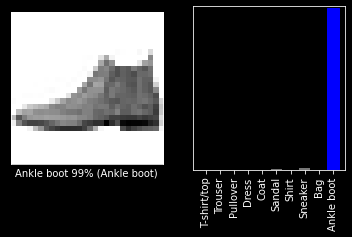

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

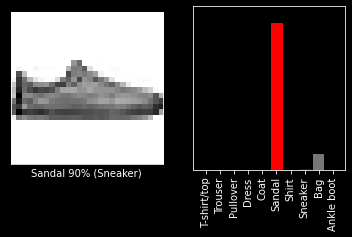

In [52]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

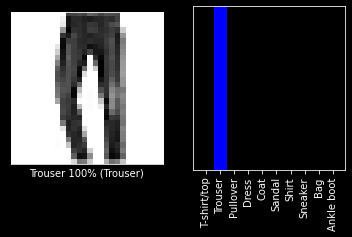

In [53]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

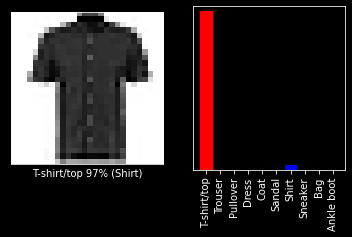

In [54]:
i = 40
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [55]:
# Now, let's make only one prediction you filthy animal. 
img = test_images[1]

print(img.shape)

(28, 28)


In [56]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [57]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.4912867e-05 4.8323941e-15 9.9920863e-01 4.0959236e-11 5.2300910e-04
  5.6286213e-16 2.2341470e-04 2.4961508e-17 6.1125571e-10 9.8886578e-13]]


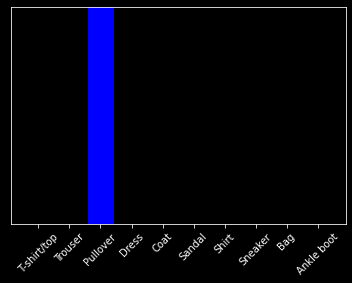

In [58]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


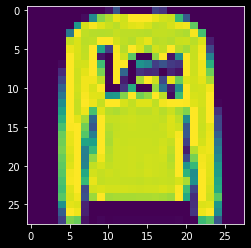

In [59]:
plt.imshow(img[0])

In [60]:
# Looks like it got it!